# Import

In [1]:
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

2022-03-02 17:56:59.941047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 17:56:59.941143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Dataset creation

In [2]:
#/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/sns/64x64/no_smile

In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data/sns/"
path

'/home/romain/code/christophelanson/icangetyoursmile/raw_data/sns/'

## Dataset function generation

In [4]:
def create_dataset(path_to_images, image_size=(64,64), batch_size=32, validation_split=0.2, random_seed=1):
    path_to_images += f'{image_size[0]}x{image_size[1]}'
      
    #Create train and validation for X,y
    
    train_dataset = image_dataset_from_directory(
        directory=path_to_images,
        labels="inferred",
        batch_size=batch_size,
        validation_split=validation_split,
        image_size=image_size,
        subset="training",
        seed=random_seed)
    
    validation_dataset = image_dataset_from_directory(
        directory=path_to_images,
        labels="inferred",
        batch_size=batch_size,
        validation_split=validation_split,
        image_size=image_size,
        subset="validation",
        seed=random_seed)
    
    
    return train_dataset, validation_dataset

### Generate Dataset

In [5]:
train_dataset, validation_dataset = create_dataset(path)

Found 6521 files belonging to 2 classes.
Using 5217 files for training.


2022-03-02 17:57:04.077283: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-03-02 17:57:04.077400: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-MPVTJ3SV): /proc/driver/nvidia/version does not exist
2022-03-02 17:57:04.077948: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 6521 files belonging to 2 classes.
Using 1304 files for validation.


In [6]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 6

## Plot results from DS

In [7]:
class_names = train_dataset.class_names
class_names

['no_smile', 'smile']

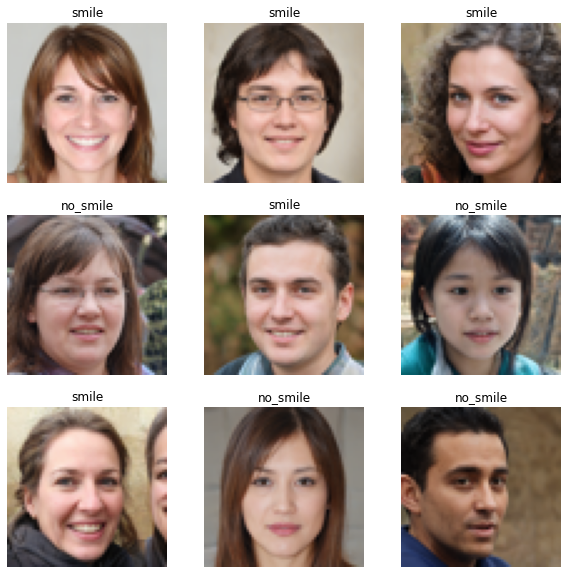

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Base Model

## Create Baseline Model

In [9]:
def initialize_model():    
    
    model = Sequential([
        layers.Conv2D(8, 3, padding='same', activation='relu', input_shape=(64,64,3)),
        layers.MaxPooling2D(),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    
    return model

## Initialize Model

In [10]:
model = initialize_model()

## Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

## Model fit

In [12]:
epochs = 1
es = EarlyStopping(patience=5, restore_best_weights=True)

In [13]:
history = model.fit(train_dataset,
                   validation_data=validation_dataset,
                   epochs=epochs,
                   batch_size=16,
                   #callbacks=[es],
                   )

164/164 [==============================] - 9s 48ms/step - loss: 1.4670 - accuracy: 0.6049 - val_loss: 0.5444 - val_accuracy: 0.7416


## Plot Accuracy & Loss

In [14]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history['val_loss']
epochs_range = range(epochs)

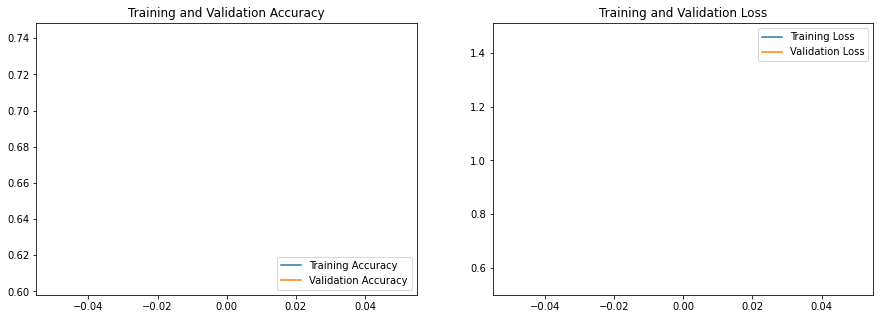

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Enhanced Model

## Create Enhanced Model

In [16]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1l2 = regularizers.L1L2(l1=0.01, l2=0.01)

In [29]:
def initialize_ReLU_model():    
    
    model = Sequential([
        layers.Conv2D(8, 4, padding='same', activation='LeakyReLU', input_shape=(64,64,3)),
        layers.Conv2D(8, 4, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Conv2D(16, 4, padding='same', activation='LeakyReLU'),
        layers.Conv2D(16, 4, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 4, padding='same', activation='LeakyReLU'),
        layers.Conv2D(32, 4, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 4, padding='same', activation='LeakyReLU'),
        layers.Conv2D(64, 4, padding='same', activation='LeakyReLU', kernel_regularizer=reg_l1),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.35),
        layers.Dense(16, activation='relu', kernel_regularizer=reg_l1),
        layers.Dense(1, activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    
    return model

## Initialize Model

In [30]:
ReLU_model = initialize_ReLU_model()

## Model Summary

In [31]:
ReLU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 8)         1032      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 16)        4112      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                  

## Model Fit

In [32]:
epochs_r = 100
es = EarlyStopping(patience=5, restore_best_weights=True)

In [33]:
history_ReLU = ReLU_model.fit(train_dataset,
                   validation_data=validation_dataset,
                   epochs=epochs_r,
                   batch_size=16,
                   callbacks=[es],
    )

Epoch 1/100
164/164 [==============================] - 17s 89ms/step - loss: 9.0450 - accuracy: 0.5984 - val_loss: 1.7164 - val_accuracy: 0.8321
Epoch 2/100
164/164 [==============================] - 15s 88ms/step - loss: 0.9995 - accuracy: 0.8695 - val_loss: 0.7704 - val_accuracy: 0.8627
Epoch 3/100
164/164 [==============================] - 14s 85ms/step - loss: 0.6490 - accuracy: 0.8835 - val_loss: 0.4728 - val_accuracy: 0.9011
Epoch 4/100
164/164 [==============================] - 14s 82ms/step - loss: 0.4345 - accuracy: 0.9049 - val_loss: 0.4308 - val_accuracy: 0.9087
Epoch 5/100
164/164 [==============================] - 14s 83ms/step - loss: 0.4079 - accuracy: 0.9099 - val_loss: 0.4086 - val_accuracy: 0.9041
Epoch 6/100
164/164 [==============================] - 14s 85ms/step - loss: 0.3945 - accuracy: 0.9157 - val_loss: 0.3974 - val_accuracy: 0.9087
Epoch 7/100
164/164 [==============================] - 14s 86ms/step - loss: 0.3692 - accuracy: 0.9210 - val_loss: 0.3804 - val_ac

## Plot Accuracy & Loss

In [34]:
acc_r = history_ReLU.history['accuracy']
val_acc_r = history_ReLU.history["val_accuracy"]
loss_r = history_ReLU.history["loss"]
val_loss_r = history_ReLU.history['val_loss']
#epochs_range_r = range(epochs_r)
epochs_range_r = range(12)

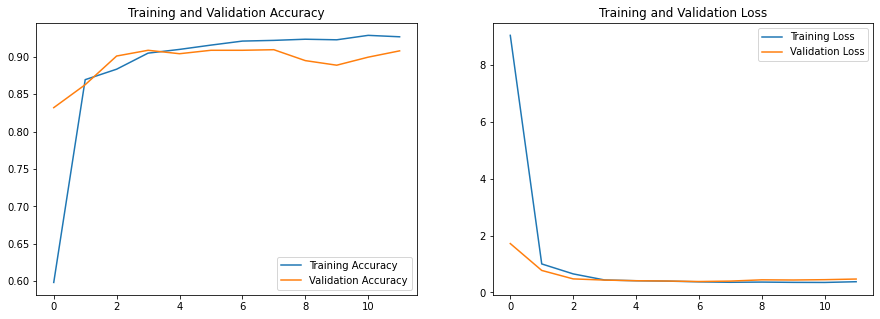

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_r, acc_r, label='Training Accuracy')
plt.plot(epochs_range_r, val_acc_r, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_r, loss_r, label='Training Loss')
plt.plot(epochs_range_r, val_loss_r, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
ReLU_model.evaluate(train_dataset)

164/164 [==============================] - 5s 29ms/step - loss: 0.3249 - accuracy: 0.9251


[0.3248855471611023, 0.9250527024269104]

In [37]:
max(val_acc_r)

0.9095091819763184

In [38]:
min(val_loss_r)

0.38036710023880005

# Model Comparison

## Dropout

In [ ]:
Model_1 = {"epochs": 20, "dropout":0.2, "accuracy":0.9898, "val_accuracy":0.8957}

In [ ]:
Model_2 = {"epochs": 20, "dropout":0.5, "accuracy":0.9641, "val_accuracy":0.9087}

In [ ]:
Model_3 = {"epochs": 20, "dropout":0.3, "accuracy":0.9655, "val_accuracy":0.9095}

In [ ]:
Model_4 = {"epochs": 20, "dropout":[0.5,0.3], "accuracy":0.9317, "val_accuracy":0.9026}

## Regularization

In [ ]:
Model_5 = {"epochs": 20, "regularization":"L2", "rate":0.01, "accuracy":0.9752, "val_accuracy":0.9018}

In [ ]:
Model_6 = {"epochs": 20, "regularization":"L1", "rate":0.01, "accuracy":0.9336, "val_accuracy":0.9102}

In [ ]:
Model_7 = {"epochs": 20, "regularization":"L1L2", "rate":0.1, "accuracy":0.9252, "val_accuracy":0.9064}

## Dropout & Regularization

In [ ]:
Model_8 = {"epochs": 20, "dropout":0.3, "regularization":"L1", "rate":0.01 ,"accuracy":0.9177, "val_accuracy":0.9041}

In [ ]:
Model_9 = {"epochs": 20, "dropout":0.3, "regularization":"L2", "rate":0.01 ,"accuracy":0.9181, "val_accuracy":0.9003}

In [ ]:
Model_10 = {"epochs": 20, "dropout":0.3, "regularization":"L1L2", "rate":0.01 ,"accuracy":0.8945, "val_accuracy":0.8780}

In [ ]:
Model_10 = {"epochs": 20, "dropout":0.1, "regularization":"L1", "rate":0.01 ,"accuracy":0.9177, "val_accuracy":0.8995}

In [ ]:
Model_11 = {"epochs": 20, "dropout":0.35, "regularization":"L1", "rate":0.01 ,"accuracy":0.9154, "val_accuracy":0.9064}

In [ ]:
Model_12 = {"epochs": 50, "dropout":0.35, "regularization":"L1", "rate":0.01 ,"accuracy":0.9154, "val_accuracy":0.9064}

## Double Convolution Layers

In [ ]:
Model_13 = {"epochs": 20, "dropout":0.35, "regularization":"L1", "rate":0.01 ,"accuracy":0.9570, "val_accuracy":0.9087}
#Only one L1 regularizer on the last CONV2D

In [ ]:
Model_14 = {"epochs": 20, "dropout":0.3, "regularization":"L1", "rate":0.01 ,"accuracy":0.9482, "val_accuracy":0.9079}
#Only one L1 regularizer on the last CONV2D

## Kernel Size

In [ ]:
Model_15 = {"epochs": 20, "dropout":0.35, "regularization":"L1", "rate":0.01 ,"kernel":(4,4),"accuracy":0.9668, "val_accuracy":0.9141, "loss":0.3291, "val_loss":0.3814}

In [ ]:
Model_16 = {"epochs": 20, "dropout":0.35, "regularization":"L1", "rate":0.01 ,"kernel":[(4,4), (2,2)],"accuracy":0.9403, "val_accuracy":0.9164, "loss":0.2216, "val_loss":0.2972}